In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
retail = pd.read_csv("datasets/online_retail_II.csv")
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [3]:
retail.rename(columns={'Invoice': 'invoice', 'StockCode': 'stock_code', 'Quantity': 'quantity', 'InvoiceDate': 'date', 'Price': 'unit_price', 'Country': 'country', 'Description': 'desc', 'Customer ID': 'cust_id'}, index=str, inplace=True
)
retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   invoice     525461 non-null  object 
 1   stock_code  525461 non-null  object 
 2   desc        522533 non-null  object 
 3   quantity    525461 non-null  int64  
 4   date        525461 non-null  object 
 5   unit_price  525461 non-null  float64
 6   cust_id     417534 non-null  float64
 7   country     525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ MB


In [5]:
retail.isnull().sum().sort_values(ascending=True)

invoice            0
stock_code         0
quantity           0
date               0
unit_price         0
country            0
desc            2928
cust_id       107927
dtype: int64

In [6]:
retail.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,525461.0,10.337667,107.424110,-9600.00,1.00,3.0,10.00,19152.00
unit_price,525461.0,4.688834,146.126914,-53594.36,1.25,2.1,4.21,25111.09
cust_id,417534.0,15360.645478,1680.811316,12346.00,13983.00,15311.0,16799.00,18287.00


In [7]:
retail.loc[retail['unit_price'] == 25111.09]

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
241824,C512770,M,Manual,-1,17/06/2010 16:52,25111.09,17399.0,United Kingdom
241827,512771,M,Manual,1,17/06/2010 16:53,25111.09,NaN,United Kingdom


In [8]:
retail[retail['unit_price'] == -53594.36]

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
179403,A506401,B,Adjust bad debt,1,29/04/2010 13:36,-53594.36,NaN,United Kingdom


In [9]:
#check outliers
(retail['unit_price'] <= 0).sum()

3690

In [10]:
(retail['quantity'] <= 0).sum()

12326

In [11]:
((retail['unit_price'] <= 0) & (retail['quantity'] <=0) & (retail['cust_id'].isnull())).sum()

2121

In [12]:
#so total missing and outliers is too small only 0.4 percent of total
null_retail = retail[retail.isnull().any(axis=1)]
null_retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
263,489464,21733,85123a mixed,-96,01/12/2009 10:52,0.00,NaN,United Kingdom
283,489463,71477,short,-240,01/12/2009 10:52,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,01/12/2009 10:53,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,01/12/2009 11:44,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,01/12/2009 11:49,0.55,NaN,United Kingdom


In [13]:
#so cleaning missing null values
new_retail = retail.dropna()

In [14]:
new_retail = new_retail[(new_retail['unit_price'] > 0) & (new_retail['quantity'] > 0)]

In [15]:
new_retail.describe()

,quantity,unit_price,cust_id
count,407664.000000,407664.000000,407664.000000
mean,13.585585,3.294438,15368.592598
std,96.840747,34.757965,1679.762138
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


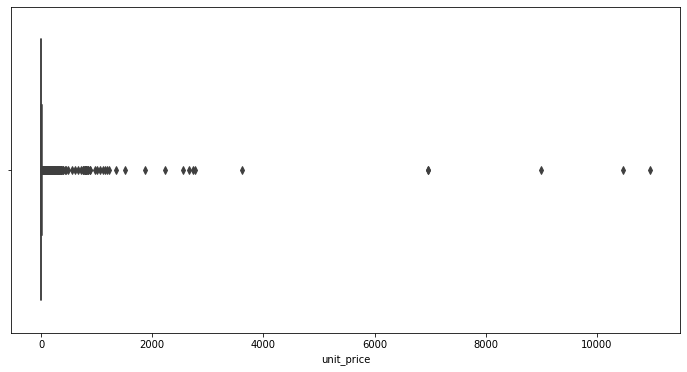

In [16]:
plt.subplots(figsize= (12,6))
up = sns.boxplot(new_retail.unit_price)

In [17]:
new_retail = new_retail[new_retail.unit_price < 6000]
new_retail.describe()

,quantity,unit_price,cust_id
count,407659.000000,407659.000000,407659.000000
mean,13.585740,3.185750,15368.593562
std,96.841331,14.494341,1679.761725
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,3610.500000,18287.000000


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


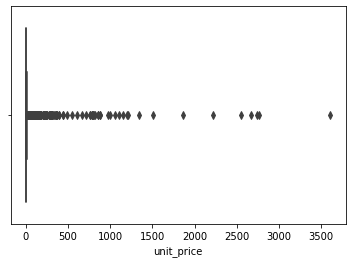

In [18]:
up_new = sns.boxplot(new_retail.unit_price)

C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


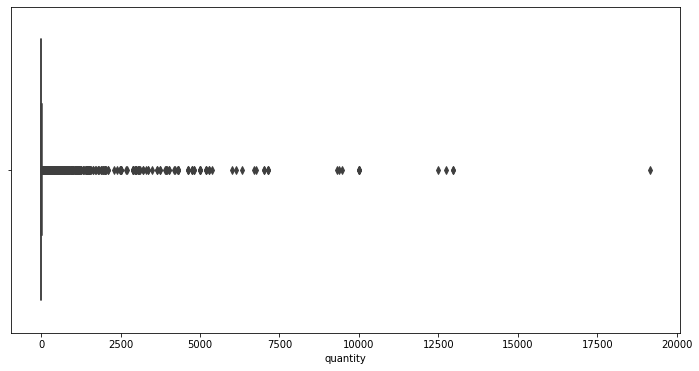

In [19]:
plt.subplots(figsize=(12, 6))
q = sns.boxplot(new_retail.quantity)

In [20]:
new_retail = new_retail[new_retail.quantity < 15000]
new_retail.describe()

,quantity,unit_price,cust_id
count,407658.000000,407658.000000,407658.000000
mean,13.538792,3.185757,15368.597160
std,92.085647,14.494358,1679.762214
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,12960.000000,3610.500000,18287.000000


C:\Users\acer\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


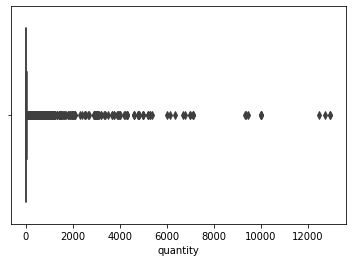

In [21]:
q_new = sns.boxplot(new_retail.quantity)

In [22]:
new_retail[(new_retail.desc.isnull()) & (new_retail.cust_id.isnull())]

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country


In [23]:
new_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407658 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   invoice     407658 non-null  object 
 1   stock_code  407658 non-null  object 
 2   desc        407658 non-null  object 
 3   quantity    407658 non-null  int64  
 4   date        407658 non-null  object 
 5   unit_price  407658 non-null  float64
 6   cust_id     407658 non-null  float64
 7   country     407658 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 28.0+ MB


In [24]:
retail = new_retail
retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [25]:
#so cleaning process is done
#let data preparation and feature engineering
#data preparation
retail.desc = retail.desc.str.lower()
retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,pink cherry lights,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,white cherry lights,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"record frame 7"" single size",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [26]:
#convert datetime format
retail['date'] = pd.to_datetime(retail.date, format= '%d/%m/%Y %H:%M')

In [27]:
retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [28]:
retail.insert(loc = 4, column = 'year_month', value = retail.date.map(lambda x: 100 * x.year + x.month))

In [29]:
retail.insert(loc = 5, column = 'year', value = retail.date.dt.year)

In [30]:
retail.insert(loc = 6, column = 'month', value = retail.date.dt.month)
retail.insert(loc = 7, column = 'day', value = retail.date.dt.day)
retail.insert(loc = 8, column = 'hour', value = retail.date.dt.hour)
retail.insert(loc = 9, column = 'day_of_week', value = (retail.date.dt.dayofweek)+1)

In [31]:
retail.head()

,invoice,stock_code,desc,quantity,year_month,year,month,day,hour,day_of_week,date,unit_price,cust_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,pink cherry lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,white cherry lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"record frame 7"" single size",48,200912,2009,12,1,7,2,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,200912,2009,12,1,7,2,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [32]:
retail.insert(loc = 11, column = 'spent', value = (retail['quantity'] * retail.unit_price))
retail.head()

,invoice,stock_code,desc,quantity,year_month,year,month,day,hour,day_of_week,date,spent,unit_price,cust_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,83.4,6.95,13085.0,United Kingdom
1,489434,79323P,pink cherry lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,81.0,6.75,13085.0,United Kingdom
2,489434,79323W,white cherry lights,12,200912,2009,12,1,7,2,2009-12-01 07:45:00,81.0,6.75,13085.0,United Kingdom
3,489434,22041,"record frame 7"" single size",48,200912,2009,12,1,7,2,2009-12-01 07:45:00,100.8,2.10,13085.0,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,200912,2009,12,1,7,2,2009-12-01 07:45:00,30.0,1.25,13085.0,United Kingdom


In [33]:
#Data analysis
#finding the answers in our data
#1 Which customers placed the most and fewest orders

ord_cust = retail.groupby(by= ['cust_id', 'country'], as_index= False)['invoice'].count()
ord_cust.head()

,cust_id,country,invoice
0,12346.0,United Kingdom,33
1,12347.0,Iceland,71
2,12348.0,Finland,20
3,12349.0,Italy,102
4,12351.0,Unspecified,21


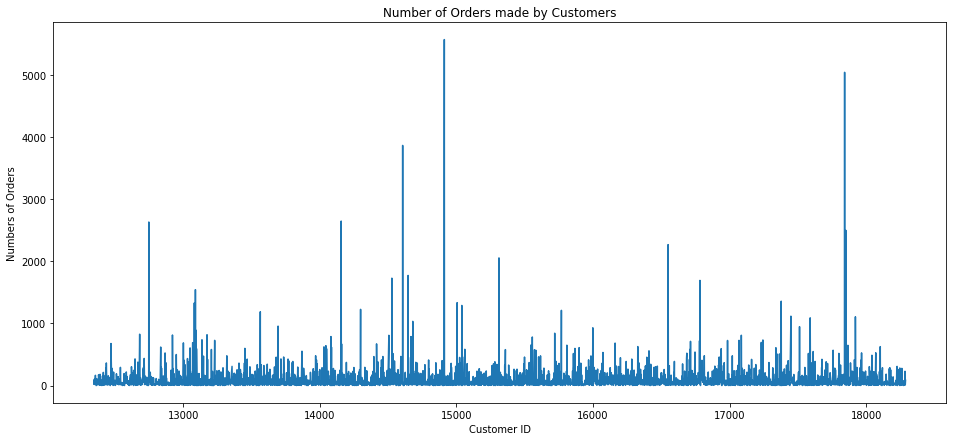

In [34]:
plt.subplots(figsize = (16, 7))
oc = plt.plot(ord_cust.cust_id, ord_cust.invoice)
plt.title('Number of Orders made by Customers')
plt.xlabel('Customer ID')
plt.ylabel('Numbers of Orders')
plt.show()

In [35]:
ord_cust.describe()

,cust_id,invoice
count,4315.000000,4315.000000
mean,15346.442642,94.474623
std,1702.986420,201.977000
min,12346.000000,1.000000
25%,13878.500000,18.000000
50%,15346.000000,44.000000
75%,16833.500000,102.000000
max,18287.000000,5570.000000


In [36]:
ord_cust.sort_values(by='invoice', ascending=False).head()

,cust_id,country,invoice
1844,14911.0,EIRE,5570
3992,17841.0,United Kingdom,5043
1610,14606.0,United Kingdom,3866
1273,14156.0,EIRE,2648
256,12748.0,United Kingdom,2633


In [37]:
ord_cust.sort_values(by='invoice', ascending=True).head()

,cust_id,country,invoice
1792,14845.0,United Kingdom,1
606,13217.0,United Kingdom,1
609,13222.0,United Kingdom,1
167,12606.0,Spain,1
1264,14144.0,United Kingdom,1


In [38]:
spent_cust = retail.groupby(by=['cust_id', 'country', 'quantity', 'unit_price'], as_index=False)['spent'].sum()
spent_cust.head()

,cust_id,country,quantity,unit_price,spent
0,12346.0,United Kingdom,1,1.00,1.00
1,12346.0,United Kingdom,1,3.25,3.25
2,12346.0,United Kingdom,1,5.95,23.80
3,12346.0,United Kingdom,1,7.49,142.31
4,12346.0,United Kingdom,5,4.50,157.50


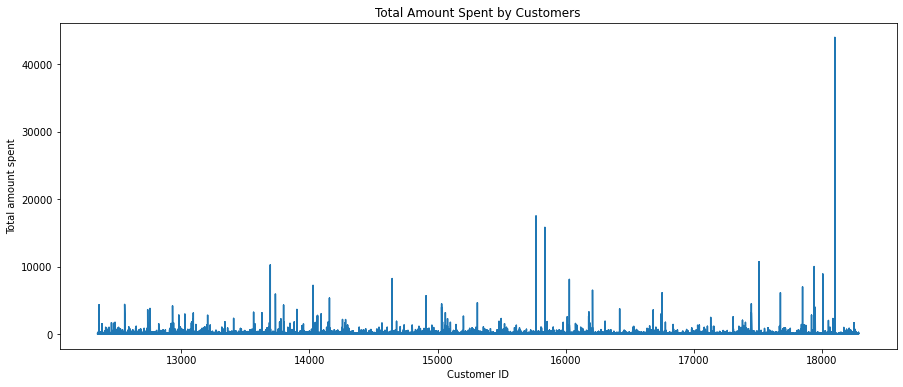

In [39]:
plt.subplots(figsize=(15,6))
sc = plt.plot(spent_cust.cust_id, spent_cust.spent)
plt.title('Total Amount Spent by Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total amount spent')
plt.show()

In [40]:
spent_cust.sort_values(by='spent', ascending=False).head()

,cust_id,country,quantity,unit_price,spent
144871,18102.0,United Kingdom,300,4.58,43968.0
144915,18102.0,United Kingdom,600,3.00,18000.0
82744,15769.0,United Kingdom,200,1.65,17490.0
84312,15838.0,United Kingdom,9360,1.69,15818.4
144912,18102.0,United Kingdom,576,3.00,13824.0


In [41]:
spent_cust.sort_values(by='spent', ascending=True).head()

,cust_id,country,quantity,unit_price,spent
48967,14459.0,United Kingdom,1,0.001,0.001
32451,13765.0,United Kingdom,1,0.001,0.001
124745,17350.0,United Kingdom,1,0.001,0.001
44358,14249.0,United Kingdom,1,0.001,0.001
27696,13583.0,United Kingdom,1,0.001,0.001


In [42]:
ord_month = retail.groupby(['invoice'])['year_month'].unique().value_counts().sort_index()

In [44]:
ord_month

[200912]    1512
[201001]    1010
[201002]    1104
[201003]    1521
[201004]    1329
[201005]    1377
[201006]    1497
[201007]    1381
[201008]    1293
[201009]    1688
[201010]    2133
[201011]    2587
[201012]     776
Name: year_month, dtype: int64

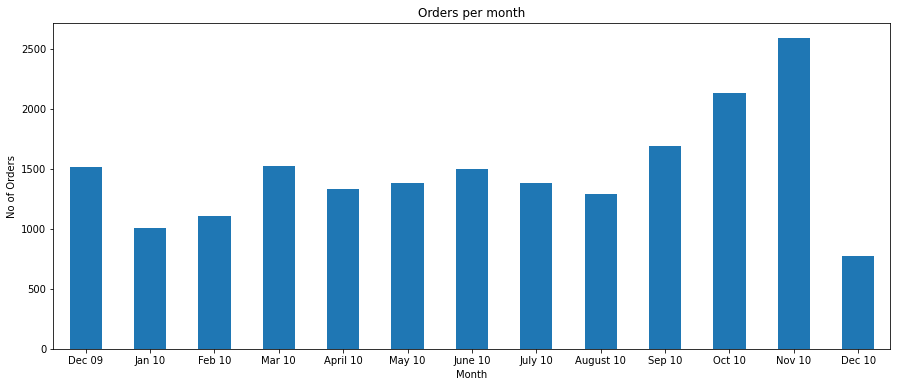

In [45]:
cm = ord_month.plot(kind='bar', figsize=(15,6))
cm.set_title('Orders per month')
cm.set_xlabel('Month')
cm.set_ylabel('No of Orders')
cm.set_xticklabels(('Dec 09', 'Jan 10', 'Feb 10', 'Mar 10', 'April 10', 'May 10', 'June 10', 'July 10', 'August 10', 'Sep 10', 'Oct 10', 'Nov 10', 'Dec 10'), rotation = 'horizontal')
plt.show()

In [46]:
ord_day = retail.groupby('invoice')['day'].unique().value_counts().sort_index()

In [48]:
ord_day

[1]     708
[2]     696
[3]     610
[4]     595
[5]     661
[6]     572
[7]     812
[8]     827
[9]     689
[10]    609
[11]    655
[12]    576
[13]    512
[14]    634
[15]    732
[16]    617
[17]    600
[18]    687
[19]    601
[20]    506
[21]    649
[22]    636
[23]    573
[24]    602
[25]    667
[26]    672
[27]    517
[28]    671
[29]    614
[30]    457
[31]    251
Name: day, dtype: int64

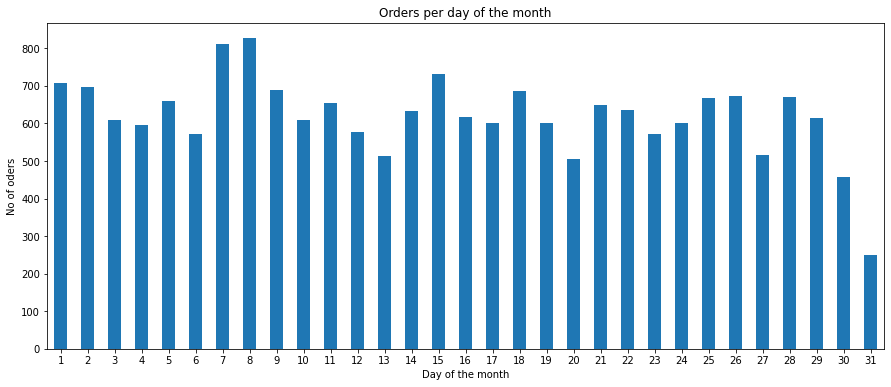

In [49]:
od = ord_day.plot(kind='bar', figsize=(15,6))
od.set_title('Orders per day of the month')
od.set_xlabel('Day of the month')
od.set_ylabel('No of oders')
od.set_xticklabels(labels = [i for i in range (1, 32)], rotation='horizontal')
plt.show()

In [50]:
ord_dayofweek = retail.groupby('invoice')['day_of_week'].unique().value_counts().sort_index()

In [52]:
ord_dayofweek

[1]    2985
[2]    3513
[3]    3426
[4]    3976
[5]    2612
[6]      30
[7]    2666
Name: day_of_week, dtype: int64

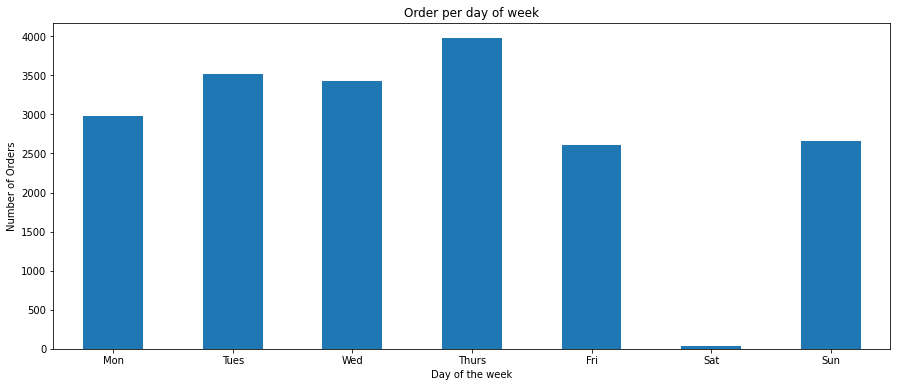

In [53]:
owd = ord_dayofweek.plot(kind='bar', figsize=(15,6))
owd.set_title('Order per day of week')
owd.set_xlabel('Day of the week')
owd.set_ylabel('Number of Orders')
owd.set_xticklabels(labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation = 'horizontal')
plt.show()

In [54]:
ord_hour = retail.groupby('invoice')['hour'].unique().value_counts().sort_index()

In [56]:
ord_hour

[7]       49
[8]      444
[9]     1209
[10]    2232
[11]    2407
[12]    3173
[13]    2891
[14]    2365
[15]    2061
[16]    1263
[17]     637
[18]     258
[19]     185
[20]      34
Name: hour, dtype: int64

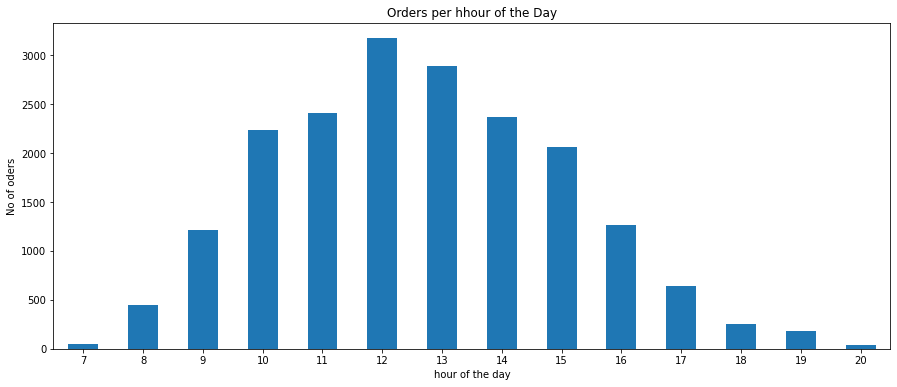

In [57]:
ord_hour = ord_hour.plot(kind='bar', figsize=(15,6))
ord_hour.set_title('Orders per hhour of the Day')
ord_hour.set_xlabel('hour of the day')
ord_hour.set_ylabel('No of oders')
ord_hour.set_xticklabels(labels = [i for i in range (7, 21)], rotation='horizontal')
plt.show()

In [58]:
q_item = retail.groupby('desc', as_index=False)['quantity'].sum()

In [59]:
q_item.head()

,desc,quantity
0,doormat union jack guns and roses,169
1,3 stripey mice feltcraft,663
2,4 purple flock dinner candles,200
3,animal stickers,385
4,bank charges,2


In [61]:
q_item.sort_values(by='quantity', ascending=False).head()

,desc,quantity
4260,white hanging heart t-light holder,56915
4366,world war 2 gliders asstd designs,54754
691,brocade ring purse,48166
2632,pack of 72 retro spot cake cases,45156
262,assorted colour bird ornament,44551


In [62]:
q_item.sort_values(by='quantity', ascending=False).tail()

,desc,quantity
2544,opal white/silver flower necklace,1
1789,green chenille shaggy c/cover,1
2337,midnight blue crystal drop earrings,1
3728,"silicon cube 25w, blue",1
1381,"f.fairy s/3 sml candle, lavender",1


In [63]:
# which countries is the most and fewest orders
ord_coun = retail.groupby('country')['invoice'].count().sort_values()
ord_coun.head()

country
Nigeria        30
Bahrain        42
Korea          53
West Indies    54
Brazil         62
Name: invoice, dtype: int64

In [65]:
del ord_coun['United Kingdom']

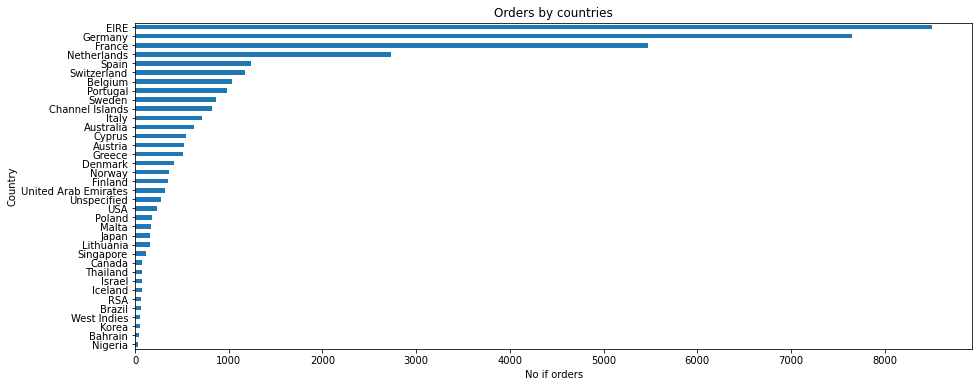

In [66]:
ocoun2 = ord_coun.plot(kind='barh', figsize=(15, 6))
ocoun2.set_xlabel('No if orders')
ocoun2.set_ylabel('Country')
ocoun2.set_title('Orders by countries')
plt.show()

In [68]:
coun_spent = retail.groupby('country')['spent'].sum().sort_values()

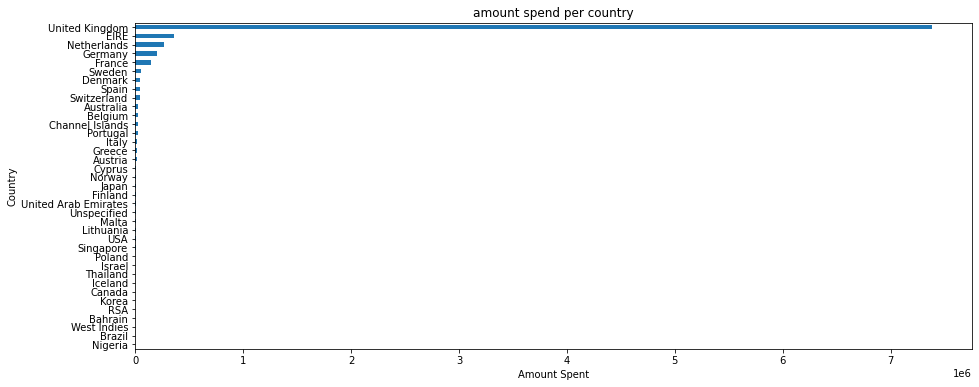

In [69]:
cs = coun_spent.plot(kind='barh', figsize=(15, 6))
cs.set_xlabel('Amount Spent')
cs.set_ylabel('Country')
cs.set_title('amount spend per country')
plt.show()

In [70]:
del coun_spent['United Kingdom']

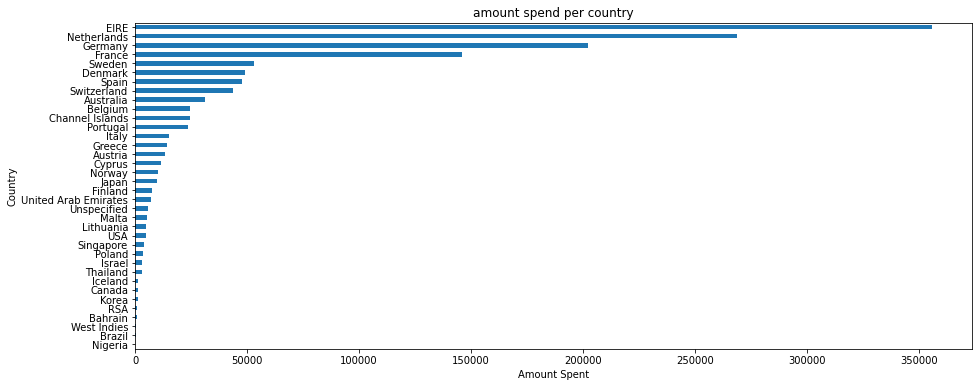

In [71]:
cs2 = coun_spent.plot(kind='barh', figsize=(15, 6))
cs2.set_xlabel('Amount Spent')
cs2.set_ylabel('Country')
cs2.set_title('amount spend per country')
plt.show()